# GRIP : The Sparks Foundation

### Data Science and Business Analytics Intern

### Author : Sayyed Hamza Husain Mohd Arif

### Task 1 : Prediction using Supervised ML

 __In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.The task has two variables where yhe feature is the no of hours studied and the target value is percentage scored.This can be solved using simple linear regression.__

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

### __Importing Dataset by url__

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

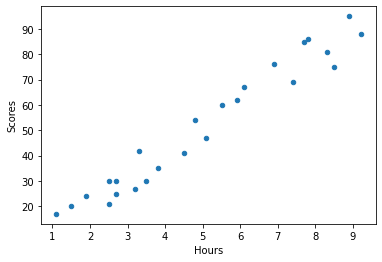

In [8]:
df.plot(kind="scatter",x="Hours",y="Scores")
plt.show()

### Correlation matrix

In [9]:
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
hours=df['Hours']
scores=df['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

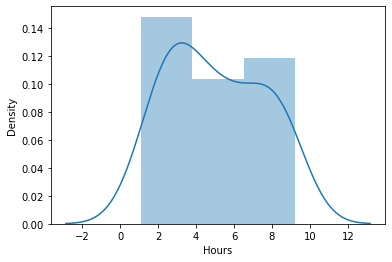

In [12]:
sns.distplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

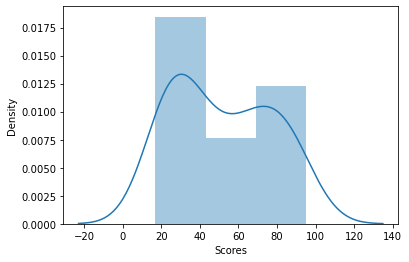

In [13]:
sns.distplot(scores)

## __Linear Regression__

In [14]:
x = df.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y = df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

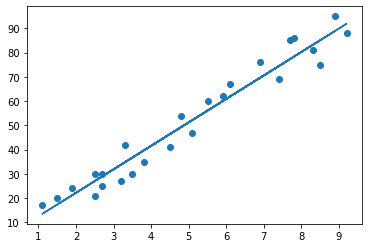

In [19]:
m = lreg.coef_
c = lreg.intercept_
line = m*x+c
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

### Comparing Actual vs Predicted

In [20]:
actual_predicted = pd.DataFrame({"Target":y_test,"Predicted":y_pred})
actual_predicted

,Target,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


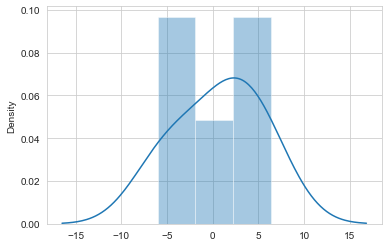

In [21]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

__What would be the predicted score if a student studies for 9.25 hours per day?__

In [22]:
h=9.25
s=lreg.predict([[h]])
print("if a student studies for {} hours per day he will score {} % in exam.".format(h,s))

if a student studies for 9.25 hours per day he will score [92.38611528] % in exam.


### __Model Evaluation__

In [23]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))

mean absolute error: 3.9207511902099244
r2 score: 0.9678055545167994
